In [ ]:
import numpy as np
import pandas as pd
import time
import tqdm


# Sorting and Splitting Labels


In [ ]:
raw_label_field = pd.read_csv("field_label_train.csv")
print(raw_label_field.head(10))
print(raw_label_field.dtypes)


   user_id  ...                     finish
0       38  ...  2018-11-21 14:15:31 +0900
1       51  ...  2018-11-21 14:15:38 +0900
2       51  ...  2018-11-21 14:31:32 +0900
3       51  ...  2018-11-21 14:31:54 +0900
4       18  ...  2018-11-22 19:19:29 +0900
5       18  ...  2018-11-22 19:20:30 +0900
6       18  ...  2018-11-22 19:23:54 +0900
7       18  ...  2018-11-22 19:31:49 +0900
8       18  ...  2018-11-22 19:35:28 +0900
9       18  ...  2018-11-22 19:44:53 +0900

[10 rows x 4 columns]
user_id              int64
activity_type_id     int64
start               object
finish              object
dtype: object


In [ ]:
raw_label_field["start"], raw_label_field["finish"] = pd.to_datetime(
    raw_label_field["start"]
).dt.tz_localize(None), pd.to_datetime(raw_label_field["finish"]).dt.tz_localize(None)
print(raw_label_field.head(10))
print(raw_label_field.dtypes)


   user_id  activity_type_id               start              finish
0       38                 1 2018-11-21 14:15:29 2018-11-21 14:15:31
1       51                 1 2018-11-21 14:15:35 2018-11-21 14:15:38
2       51                 3 2018-11-21 14:31:31 2018-11-21 14:31:32
3       51                 5 2018-11-21 14:31:52 2018-11-21 14:31:54
4       18                 5 2018-11-22 19:17:46 2018-11-22 19:19:29
5       18                 4 2018-11-22 19:20:08 2018-11-22 19:20:30
6       18                 5 2018-11-22 19:23:28 2018-11-22 19:23:54
7       18                 4 2018-11-22 19:31:08 2018-11-22 19:31:49
8       18                 5 2018-11-22 19:35:09 2018-11-22 19:35:28
9       18                 7 2018-11-22 19:42:44 2018-11-22 19:44:53
user_id                      int64
activity_type_id             int64
start               datetime64[ns]
finish              datetime64[ns]
dtype: object


In [ ]:
raw_label_field.sort_values(["start", "finish"], ascending=[True, False], inplace=True)


In [ ]:
len(raw_label_field)


1477

In [ ]:
field_users = raw_label_field["user_id"].unique().tolist()
print(field_users)


[38, 51, 18, 4, 7, 8]


In [ ]:
field_labels_sorted = {}
for i in field_users:
    field_labels_sorted[i] = raw_label_field[raw_label_field["user_id"] == i]
print(field_labels_sorted[18].head(10))


    user_id  activity_type_id               start              finish
4        18                 5 2018-11-22 19:17:46 2018-11-22 19:19:29
5        18                 4 2018-11-22 19:20:08 2018-11-22 19:20:30
6        18                 5 2018-11-22 19:23:28 2018-11-22 19:23:54
7        18                 4 2018-11-22 19:31:08 2018-11-22 19:31:49
8        18                 5 2018-11-22 19:35:09 2018-11-22 19:35:28
9        18                 7 2018-11-22 19:42:44 2018-11-22 19:44:53
10       18                10 2018-11-22 19:54:00 2018-11-22 19:55:10
11       18                 7 2018-11-22 21:28:31 2018-11-22 21:30:04
22       18                 9 2018-11-22 22:13:00 2018-11-22 22:16:08
26       18                10 2018-11-22 22:46:19 2018-11-22 22:47:10


In [ ]:
sum([len(field_labels_sorted[i]) for i in field_labels_sorted]) == len(raw_label_field)


True

In [ ]:
for i in field_labels_sorted:
    print(f"user {i}, before dropping duplicates: {len(field_labels_sorted[i])}")
    field_labels_sorted[i].drop_duplicates(ignore_index=True, inplace=True)
    print(f"user {i}, after dropping duplicates: {len(field_labels_sorted[i])}")


user 38, before dropping duplicates: 10
user 38, after dropping duplicates: 10
user 51, before dropping duplicates: 236
user 51, after dropping duplicates: 236
user 18, before dropping duplicates: 206
user 18, after dropping duplicates: 206
user 4, before dropping duplicates: 165
user 4, after dropping duplicates: 165
user 7, before dropping duplicates: 629
user 7, after dropping duplicates: 629
user 8, before dropping duplicates: 231
user 8, after dropping duplicates: 231


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for i in field_labels_sorted:
    field_labels_sorted[i].to_csv(f"label_user{i}_field_sorted.csv", index=False)


In [ ]:
del raw_label_field, field_labels_sorted


# Sorting and Labeling raw data


In [ ]:
def label_csv(user_path, label_path):
    st0 = time.time()
    user = pd.read_csv(user_path)
    label = pd.read_csv(label_path)
    st1 = time.time()
    print("CSV reading time:", st1 - st0)
    print("length before dropping:", len(user))
    user.dropna(inplace=True)
    print("length after dropping:", len(user))
    st2 = time.time()
    print(f"before dropping duplicates: {len(user)}")
    user.drop_duplicates("datetime", ignore_index=True, inplace=True)
    print(f"after dropping duplicates: {len(user)}")
    st = time.time()
    print("Duplicate dropping time:", st - st2)
    user.datetime = pd.to_datetime(user.datetime).dt.tz_localize(None)
    et = time.time()
    print("Datetime conversion time:", et - st)
    print(user.dtypes)
    print(user.head(10))
    user.sort_values("datetime", inplace=True)
    et2 = time.time()
    print("Sorting time:", et2 - et)
    X, Y, Z, T = [], [], [], []
    for i in tqdm(range(len(label))):
        matched = user[
            (label.loc[i, "start"] <= user.datetime)
            & (label.loc[i, "finish"] >= user.datetime)
        ]
        if matched.shape[0] == 0:
            label.drop(i, inplace=True)
            continue
        X.append(matched["x"].to_numpy())
        Y.append(matched["y"].to_numpy())
        Z.append(matched["z"].to_numpy())
        T.append(matched["datetime"].to_numpy())
        user.drop(matched.index, inplace=True)
    label["X"] = X
    label["Y"] = Y
    label["Z"] = Z
    label["T"] = T
    label.reset_index(drop=True, inplace=True)
    et3 = time.time()
    print("Labeling time:", et3 - et2)
    return label


In [ ]:
label04 = label_csv("raw_field_acc_user04.csv", "label_user4_field_sorted.csv")


CSV reading time: 15.147589206695557
length before dropping: 12625774
length after dropping: 12625774
before dropping duplicates: 12625774
after dropping duplicates: 8720962
Duplicate dropping time: 9.226978778839111
Datetime conversion time: 155.21432256698608
user_id              int64
datetime    datetime64[ns]
x                  float64
y                  float64
z                  float64
dtype: object
   user_id                datetime      x      y      z
0        4 2018-12-15 22:21:44.003  9.270 -0.306  0.371
1        4 2018-12-15 22:22:40.013  9.232 -0.421  0.377
2        4 2018-12-15 22:14:37.322  9.270 -0.344  0.386
3        4 2018-12-15 22:01:53.272  9.232 -0.421  0.376
4        4 2018-12-15 22:02:40.883  9.194 -0.498  0.374
5        4 2018-12-15 21:54:29.456  9.232 -0.344  0.382
6        4 2018-12-15 21:40:34.762  9.194 -0.306  0.377
7        4 2018-12-15 22:11:42.916  9.232 -0.421  0.375
8        4 2018-12-15 21:33:57.723  9.194 -0.421  0.383
9        4 2018-12-15 22:00:5

In [ ]:
label07 = label_csv("raw_field_acc_user07.csv", "label_user7_field_sorted.csv")


CSV reading time: 18.74940538406372
length before dropping: 15716507
length after dropping: 15716507
before dropping duplicates: 15716507
after dropping duplicates: 14019561
Duplicate dropping time: 14.163227796554565
Datetime conversion time: 245.4979054927826
user_id              int64
datetime    datetime64[ns]
x                  float64
y                  float64
z                  float64
dtype: object
   user_id                datetime      x      y      z
0        7 2018-12-09 21:55:32.758 -8.427 -0.536 -4.236
1        7 2018-12-09 22:37:52.955 -8.427 -0.612 -4.178
2        7 2018-12-09 22:18:18.534 -8.389 -0.574 -4.181
3        7 2018-12-09 22:33:58.872 -8.427 -0.498 -4.163
4        7 2018-12-09 21:59:51.099 -8.389 -0.574 -4.100
5        7 2018-12-09 22:37:25.925 -8.427 -0.612 -4.157
6        7 2018-12-09 22:37:21.326 -8.427 -0.574 -4.198
7        7 2018-12-09 22:05:22.033 -8.389 -0.536 -4.157
8        7 2018-12-09 22:20:07.975 -8.389 -0.612 -4.205
9        7 2018-12-09 21:51:2

In [ ]:
label08 = label_csv("raw_field_acc_user08.csv", "label_user8_field_sorted.csv")


CSV reading time: 16.5234055519104
length before dropping: 14280851
length after dropping: 14280851
before dropping duplicates: 14280851
after dropping duplicates: 11525126
Duplicate dropping time: 10.023940563201904
Datetime conversion time: 200.6971697807312
user_id              int64
datetime    datetime64[ns]
x                  float64
y                  float64
z                  float64
dtype: object
   user_id                datetime     x      y      z
0        8 2018-12-26 11:09:39.454 -9.73 -0.191  0.021
1        8 2018-12-26 11:19:42.494 -9.73 -0.191  0.026
2        8 2018-12-26 11:03:03.634 -9.73 -0.191  0.030
3        8 2018-12-26 10:37:45.746 -9.73 -0.191  0.024
4        8 2018-12-26 11:15:05.464 -9.73 -0.191  0.023
5        8 2018-12-26 11:35:57.997 -9.73 -0.191  0.028
6        8 2018-12-26 10:49:37.175 -9.73 -0.191  0.026
7        8 2018-12-26 10:44:54.383 -9.73 -0.191  0.036
8        8 2018-12-26 11:02:49.438 -9.73 -0.191  0.021
9        8 2018-12-26 10:59:42.624 -9.73

In [ ]:
label18 = label_csv("raw_field_acc_user18.csv", "label_user18_field_sorted.csv")


CSV reading time: 16.77708888053894
length before dropping: 12755925
length after dropping: 12755925
before dropping duplicates: 12755925
after dropping duplicates: 9022027
Duplicate dropping time: 9.611313104629517
Datetime conversion time: 158.96090507507324
user_id              int64
datetime    datetime64[ns]
x                  float64
y                  float64
z                  float64
dtype: object
   user_id                datetime      x       y      z
0       18 2018-12-18 18:49:05.859 -1.532   9.845  0.079
1       18 2018-12-21 08:11:26.151 -0.421   5.286  4.100
2       18 2018-12-16 08:04:08.230  0.344   0.459 -9.791
3       18 2018-12-02 02:55:06.616  4.252   7.010  5.763
4       18 2018-12-21 08:40:10.959  5.095   7.508  0.427
5       18 2018-12-08 23:10:01.910 -0.268   0.842 -9.760
6       18 2018-12-28 16:20:21.213  5.707   6.742  0.420
7       18 2018-12-20 17:42:26.033 -1.532  11.684 -2.438
8       18 2018-12-23 07:41:41.493 -0.766   9.615  0.088
9       18 2018-12-2

In [ ]:
label38 = label_csv("raw_field_acc_user38.csv", "Sorted/label_user38_field_sorted.csv")


CSV reading time: 12.018157958984375
length before dropping: 9737486
length after dropping: 9737486
before dropping duplicates: 9737486
after dropping duplicates: 9250951
Duplicate dropping time: 7.911951303482056
Datetime conversion time: 164.22478818893433
user_id              int64
datetime    datetime64[ns]
x                  float64
y                  float64
z                  float64
dtype: object
   user_id                datetime      x      y      z
0       38 2018-12-29 14:16:46.183 -0.268 -0.038  9.804
1       38 2018-12-16 12:56:39.490 -0.153 -0.038  9.805
2       38 2018-12-30 00:49:06.261  8.466 -0.038 -4.039
3       38 2018-12-25 00:21:15.957 -8.772 -0.038 -2.086
4       38 2018-12-24 18:59:34.247 -8.772 -0.038 -2.077
5       38 2018-12-29 19:18:23.679  9.079 -0.038 -0.498
6       38 2018-12-24 22:29:08.312 -8.849 -0.038 -2.237
7       38 2018-12-28 18:56:39.935  9.002 -0.038  0.838
8       38 2018-12-28 14:06:28.665  9.002 -0.038  0.828
9       38 2018-12-30 01:03:37.8

In [ ]:
label51 = label_csv("raw_field_acc_user51.csv", "Sorted/label_user51_field_sorted.csv")


CSV reading time: 10.154983043670654
length before dropping: 8720993
length after dropping: 8720993
before dropping duplicates: 8720993
after dropping duplicates: 6972775
Duplicate dropping time: 7.3127121925354
Datetime conversion time: 123.44080591201782
user_id              int64
datetime    datetime64[ns]
x                  float64
y                  float64
z                  float64
dtype: object
   user_id                datetime      x      y      z
0       51 2018-12-20 14:09:46.570  9.155  0.153 -0.469
1       51 2018-12-20 14:16:16.579  9.155  0.114 -0.444
2       51 2018-12-20 14:23:33.678  9.117  0.114 -0.458
3       51 2018-12-20 14:28:40.309  9.117  0.153 -0.454
4       51 2018-12-20 14:13:39.159  9.117  0.114 -0.443
5       51 2018-12-20 14:21:25.259  9.194  0.000 -0.459
6       51 2018-12-20 14:55:59.829  9.155  0.114 -0.463
7       51 2018-12-20 14:45:21.188  9.155  0.114 -0.472
8       51 2018-12-20 14:49:29.603  9.117  0.076 -0.446
9       51 2018-12-20 14:45:55.989

In [ ]:
labeled_field = pd.concat(
    [label04, label07, label08, label18, label38, label51], ignore_index=True
)


In [ ]:
print(
    len(labeled_field)
    == len(label04)
    + len(label07)
    + len(label08)
    + len(label18)
    + len(label38)
    + len(label51)
)
print(len(labeled_field))


True
938


In [ ]:
st = time.time()
labeled_field.to_pickle("labeled_field.pkl", compression="gzip")
et = time.time()
print("Pickling Time:", et - st)


Pickling Time: 12.494719505310059


In [ ]:
print(
    "Total datetime-wise length is:",
    sum([len(labeled_field.loc[i, "T"]) for i in range(len(labeled_field))]),
)


Total datetime-wise length is: 1227139


In [ ]:
st = time.time()
labeled_field.to_csv("labeled_field.csv", index=False, float_format="%.4f")
et = time.time()
print("CSV exporting time:", et - st)


CSV exporting time: 7.97342586517334


In [ ]:
(
    print(
        all(
            [
                len(labeled_field.loc[i, "X"])
                == len(labeled_field.loc[i, "Y"])
                == len(labeled_field.loc[i, "Z"])
                == len(labeled_field.loc[i, "T"])
                for i in range(len(labeled_field))
            ]
        )
    )
)


True


In [ ]:
datetimelist = labeled_field["T"].to_numpy()
datetimes = datetimelist[0]
for i in range(1, len(datetimelist)):
    datetimes = np.append(datetimes, datetimelist[i])
datetimes.shape


(1227139,)

In [ ]:
datetimes.min(), datetimes.max()


(numpy.datetime64('2018-12-01T22:50:30.481000000'),
 numpy.datetime64('2019-01-01T06:30:31.888000000'))

In [ ]:
labeled_field.dtypes


user_id              int64
activity_type_id     int64
start               object
finish              object
X                   object
Y                   object
Z                   object
T                   object
dtype: object

In [ ]:
labeled_field["user_id"].unique()


array([ 4,  7,  8, 18, 38, 51])

In [ ]:
labeled_field["activity_type_id"].unique()


array([ 5,  4,  6,  1, 12,  2,  7,  3, 10,  9])

In [ ]:
labeled_field.groupby("activity_type_id")["user_id"].count()


activity_type_id
1      84
2       6
3      15
4     239
5     289
6       6
7     106
9      19
10     26
12    148
Name: user_id, dtype: int64

In [ ]:
test_labeled = labeled_field.copy()
test_labeled["length"] = test_labeled["T"].apply(len)
test_labeled["length"]


0      209
1      151
2      211
3      207
4      454
      ... 
933     36
934     42
935     24
936     45
937     25
Name: length, Length: 938, dtype: int64

In [ ]:
test_labeled.groupby("user_id")["length"].sum()


user_id
4     327101
7     145044
8      21381
18    714038
38       844
51     18731
Name: length, dtype: int64

In [ ]:
test_labeled.groupby("activity_type_id")["length"].sum()


activity_type_id
1      17960
2        902
3      61687
4     293269
5     739990
6        828
7      76050
9       1988
10      1753
12     32712
Name: length, dtype: int64

In [ ]:
type(labeled_field["X"][0][0])


numpy.float64

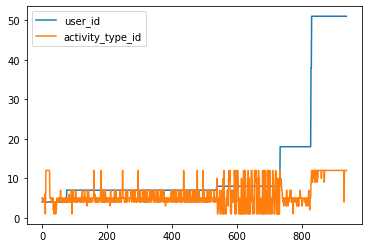

In [ ]:
labeled_field.plot()


In [ ]:
labeled_field.user_id.unique()


array([ 4,  7,  8, 18, 38, 51])

# Visualizations


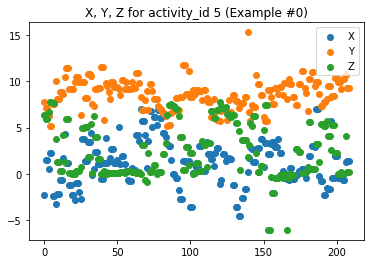

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(
    list(range(len(labeled_field.loc[0, "X"]))), labeled_field.loc[0, "X"], label="X"
)
plt.scatter(
    list(range(len(labeled_field.loc[0, "Y"]))), labeled_field.loc[0, "Y"], label="Y"
)
plt.scatter(
    list(range(len(labeled_field.loc[0, "Z"]))), labeled_field.loc[0, "Z"], label="Z"
)
plt.title("X, Y, Z for activity_id 5 (Example #0)")
plt.legend()
plt.show()


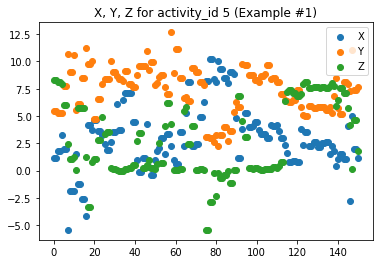

In [ ]:
plt.scatter(
    list(range(len(labeled_field.loc[1, "X"]))), labeled_field.loc[1, "X"], label="X"
)
plt.scatter(
    list(range(len(labeled_field.loc[1, "Y"]))), labeled_field.loc[1, "Y"], label="Y"
)
plt.scatter(
    list(range(len(labeled_field.loc[1, "Z"]))), labeled_field.loc[1, "Z"], label="Z"
)
plt.title("X, Y, Z for activity_id 5 (Example #1)")
plt.legend()
plt.show()


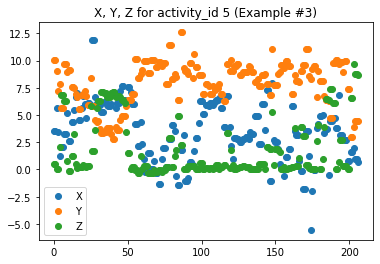

In [ ]:
plt.scatter(
    list(range(len(labeled_field.loc[3, "X"]))), labeled_field.loc[3, "X"], label="X"
)
plt.scatter(
    list(range(len(labeled_field.loc[3, "Y"]))), labeled_field.loc[3, "Y"], label="Y"
)
plt.scatter(
    list(range(len(labeled_field.loc[3, "Z"]))), labeled_field.loc[3, "Z"], label="Z"
)
plt.title("X, Y, Z for activity_id 5 (Example #3)")
plt.legend()
plt.show()


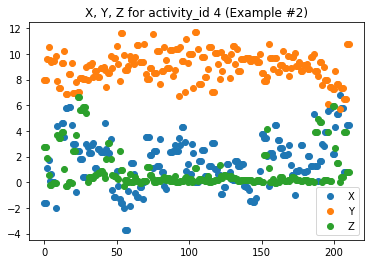

In [ ]:
plt.scatter(
    list(range(len(labeled_field.loc[2, "X"]))), labeled_field.loc[2, "X"], label="X"
)
plt.scatter(
    list(range(len(labeled_field.loc[2, "Y"]))), labeled_field.loc[2, "Y"], label="Y"
)
plt.scatter(
    list(range(len(labeled_field.loc[2, "Z"]))), labeled_field.loc[2, "Z"], label="Z"
)
plt.title("X, Y, Z for activity_id 4 (Example #2)")
plt.legend()
plt.show()


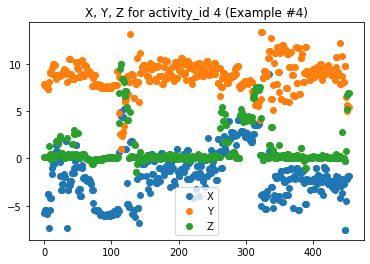

In [ ]:
plt.scatter(
    list(range(len(labeled_field.loc[4, "X"]))), labeled_field.loc[4, "X"], label="X"
)
plt.scatter(
    list(range(len(labeled_field.loc[4, "Y"]))), labeled_field.loc[4, "Y"], label="Y"
)
plt.scatter(
    list(range(len(labeled_field.loc[4, "Z"]))), labeled_field.loc[4, "Z"], label="Z"
)
plt.title("X, Y, Z for activity_id 4 (Example #4)")
plt.legend()
plt.show()


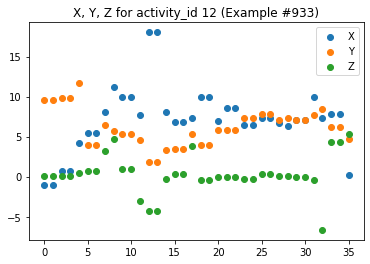

In [ ]:
plt.scatter(
    list(range(len(labeled_field.loc[933, "X"]))),
    labeled_field.loc[933, "X"],
    label="X",
)
plt.scatter(
    list(range(len(labeled_field.loc[933, "Y"]))),
    labeled_field.loc[933, "Y"],
    label="Y",
)
plt.scatter(
    list(range(len(labeled_field.loc[933, "Z"]))),
    labeled_field.loc[933, "Z"],
    label="Z",
)
plt.title("X, Y, Z for activity_id 12 (Example #933)")
plt.legend()
plt.show()


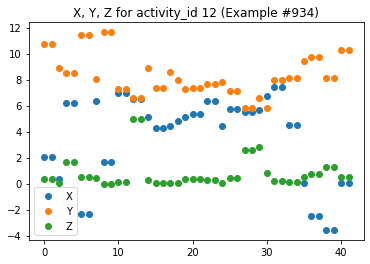

In [ ]:
plt.scatter(
    list(range(len(labeled_field.loc[934, "X"]))),
    labeled_field.loc[934, "X"],
    label="X",
)
plt.scatter(
    list(range(len(labeled_field.loc[934, "Y"]))),
    labeled_field.loc[934, "Y"],
    label="Y",
)
plt.scatter(
    list(range(len(labeled_field.loc[934, "Z"]))),
    labeled_field.loc[934, "Z"],
    label="Z",
)
plt.title("X, Y, Z for activity_id 12 (Example #934)")
plt.legend()
plt.show()


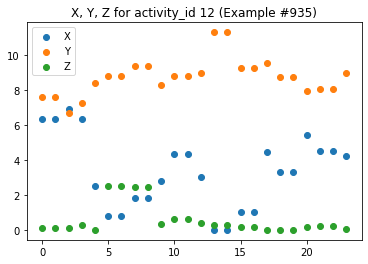

In [ ]:
plt.scatter(
    list(range(len(labeled_field.loc[935, "X"]))),
    labeled_field.loc[935, "X"],
    label="X",
)
plt.scatter(
    list(range(len(labeled_field.loc[935, "Y"]))),
    labeled_field.loc[935, "Y"],
    label="Y",
)
plt.scatter(
    list(range(len(labeled_field.loc[935, "Z"]))),
    labeled_field.loc[935, "Z"],
    label="Z",
)
plt.title("X, Y, Z for activity_id 12 (Example #935)")
plt.legend()
plt.show()


# Filtering


In [ ]:
from scipy import signal
import matplotlib.dates as mdates


In [ ]:
ex_1 = np.vstack(
    (labeled_field.loc[0, "X"], labeled_field.loc[0, "Y"], labeled_field.loc[0, "Z"])
)
ex_1


array([[-2.2210e+00,  1.4550e+00,  1.4550e+00,  5.7400e-01,  2.2600e+00,
         2.2600e+00, -2.3750e+00, -2.3750e+00, -3.2940e+00, -2.1450e+00,
        -2.1450e+00, -6.8900e-01, -6.8900e-01,  1.7620e+00,  4.2900e+00,
         1.1490e+00,  1.1490e+00, -1.1870e+00, -1.1870e+00, -2.2210e+00,
        -2.2210e+00, -2.7960e+00, -9.5700e-01, -9.5700e-01, -1.9150e+00,
        -2.6810e+00,  3.7920e+00,  3.7920e+00,  1.4170e+00,  1.4170e+00,
         3.4470e+00,  3.4470e+00,  4.4050e+00, -7.6000e-02,  5.3600e-01,
         2.3360e+00,  2.3360e+00,  1.0340e+00,  1.0340e+00, -4.9800e-01,
        -4.9800e-01,  1.2250e+00,  3.9070e+00,  1.1870e+00,  1.3790e+00,
         1.7230e+00,  2.6430e+00,  2.6430e+00,  1.1490e+00,  1.1490e+00,
         1.4550e+00,  5.0560e+00,  1.0720e+00,  1.9150e+00,  1.9150e+00,
         1.0340e+00,  3.4400e-01, -6.5100e-01, -7.6600e-01, -7.6600e-01,
         6.8900e-01,  4.5900e-01,  4.5900e-01,  4.2130e+00,  4.2130e+00,
         3.6010e+00,  6.9720e+00,  5.6690e+00,  5.6

In [ ]:
ex_1.shape


(3, 209)

In [ ]:
x_1 = signal.medfilt(ex_1[0, :])
y_1 = signal.medfilt(ex_1[1, :])
z_1 = signal.medfilt(ex_1[2, :])


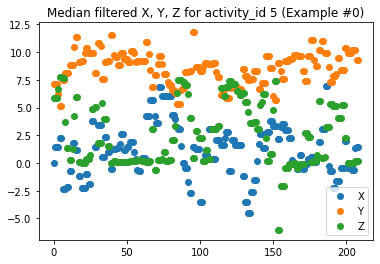

In [ ]:
plt.scatter(list(range(len(x_1))), x_1, label="X")
plt.scatter(list(range(len(y_1))), y_1, label="Y")
plt.scatter(list(range(len(z_1))), z_1, label="Z")
plt.title("Median filtered X, Y, Z for activity_id 5 (Example #0)")
plt.legend()
plt.show()


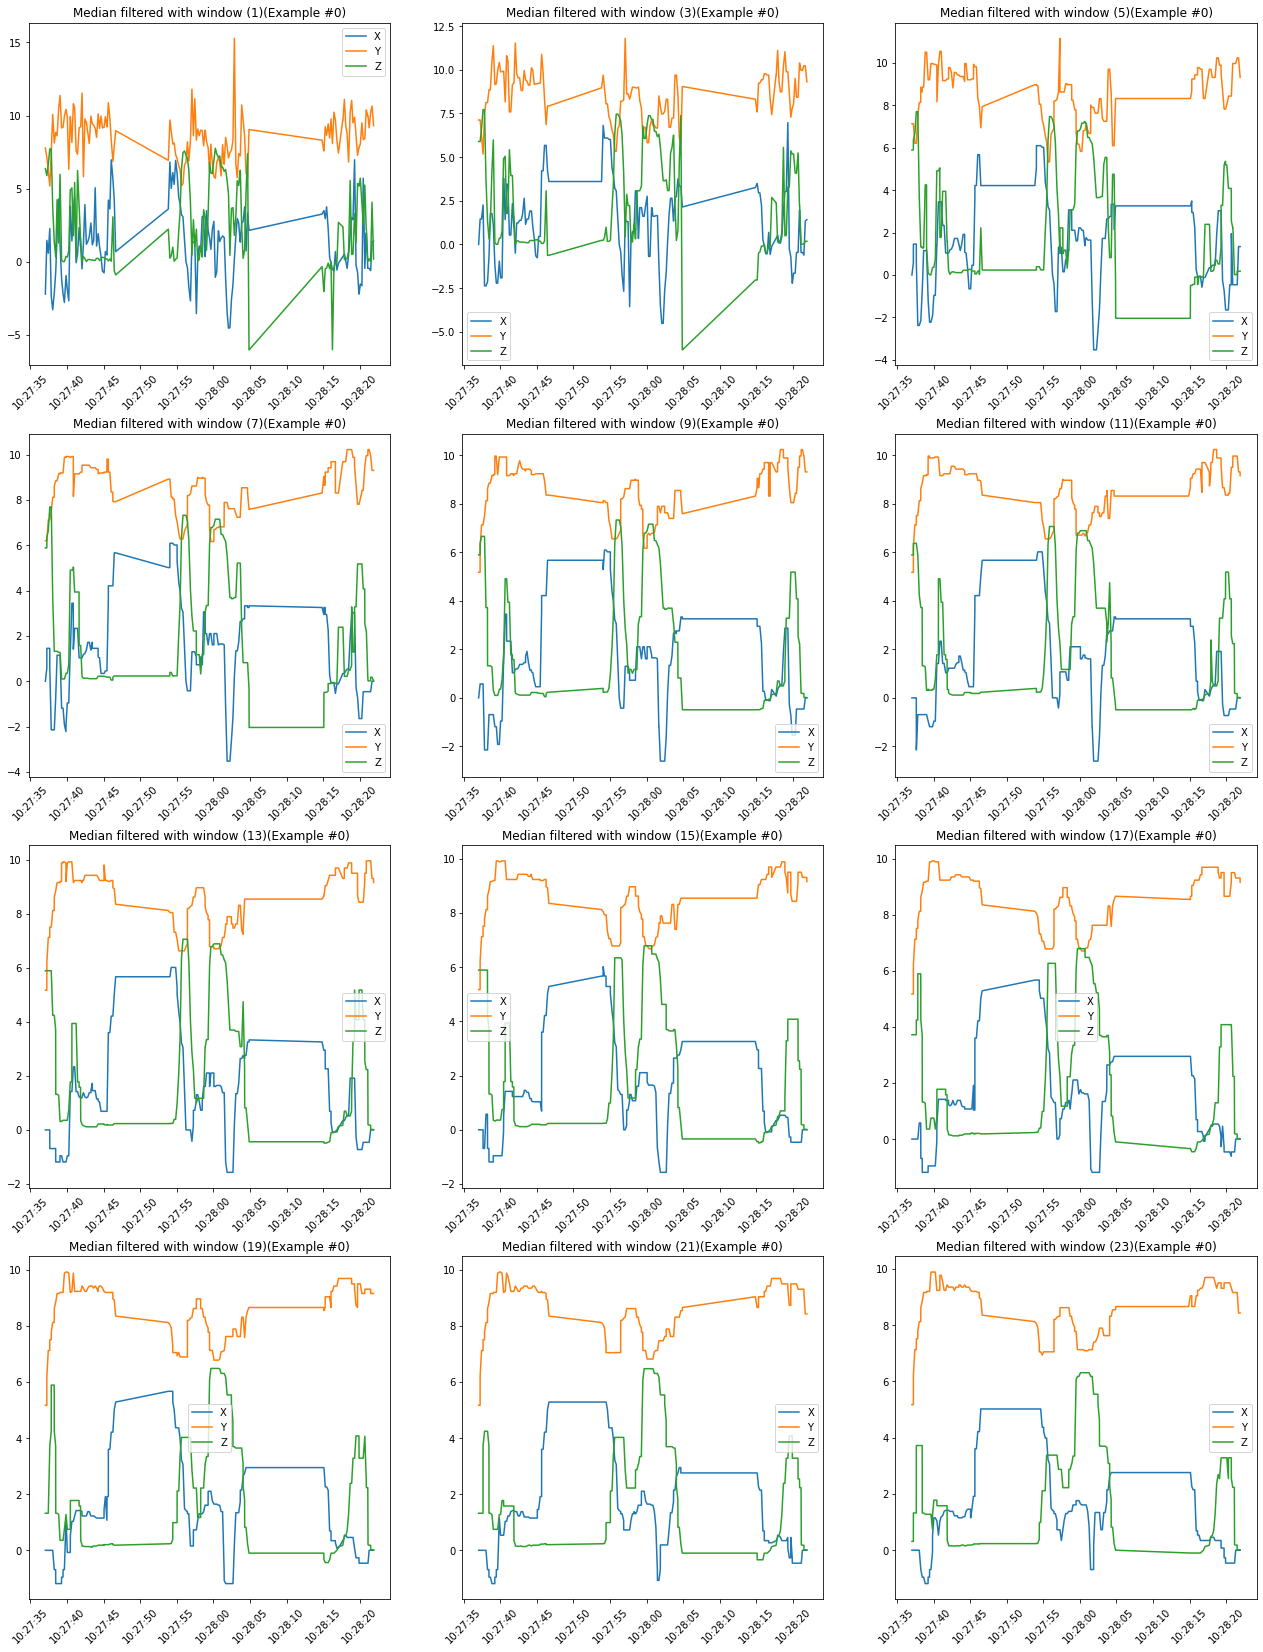

In [ ]:
w_size = {1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23}
plt.figure(figsize=(22, 29))
for i in w_size:
    plt.subplot(4, 3, i // 2 + 1)
    x_1 = signal.medfilt(ex_1[0, :], i)
    y_1 = signal.medfilt(ex_1[1, :], i)
    z_1 = signal.medfilt(ex_1[2, :], i)
    plt.plot(labeled_field.loc[0, "T"], x_1, label="X")
    plt.plot(labeled_field.loc[0, "T"], y_1, label="Y")
    plt.plot(labeled_field.loc[0, "T"], z_1, label="Z")
    plt.xticks(rotation=45)
    plt.gca().fmt_xdata = mdates.DateFormatter("%M:%S")
    plt.title(f"Median filtered with window ({i})(Example #0)")
    plt.legend()


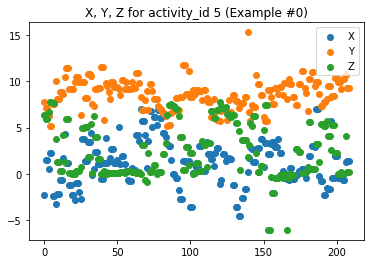

In [ ]:
plt.scatter(
    list(range(len(labeled_field.loc[0, "X"]))), labeled_field.loc[0, "X"], label="X"
)
plt.scatter(
    list(range(len(labeled_field.loc[0, "Y"]))), labeled_field.loc[0, "Y"], label="Y"
)
plt.scatter(
    list(range(len(labeled_field.loc[0, "Z"]))), labeled_field.loc[0, "Z"], label="Z"
)
plt.title("X, Y, Z for activity_id 5 (Example #0)")
plt.legend()
plt.show()


In [ ]:
xyz = signal.medfilt(ex_1)
xyz


array([[ 0.000e+00,  1.455e+00,  1.455e+00,  1.455e+00,  2.260e+00,
         2.260e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  1.762e+00,  1.762e+00,
         1.149e+00,  1.149e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  3.792e+00,  3.792e+00,  1.417e+00,  1.417e+00,
         3.447e+00,  3.447e+00,  3.447e+00,  5.360e-01,  5.360e-01,
         2.336e+00,  2.336e+00,  1.034e+00,  1.034e+00,  0.000e+00,
         0.000e+00,  1.225e+00,  1.225e+00,  1.379e+00,  1.379e+00,
         1.723e+00,  2.643e+00,  2.643e+00,  1.149e+00,  1.149e+00,
         1.455e+00,  1.455e+00,  1.915e+00,  1.915e+00,  1.915e+00,
         1.034e+00,  3.440e-01,  0.000e+00,  0.000e+00,  0.000e+00,
         4.590e-01,  4.590e-01,  4.590e-01,  4.213e+00,  4.213e+00,
         4.213e+00,  5.669e+00,  5.669e+00,  5.669e+00,  4.213e+00,
         3.601e+00,  3.601e+00,  6.818e+00,  6.8

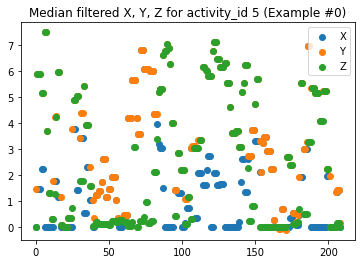

In [ ]:
plt.scatter(list(range(len(xyz[0]))), xyz[0], label="X")
plt.scatter(list(range(len(xyz[0]))), xyz[1], label="Y")
plt.scatter(list(range(len(xyz[0]))), xyz[2], label="Z")
plt.title("Median filtered X, Y, Z for activity_id 5 (Example #0)")
plt.legend()
plt.show()


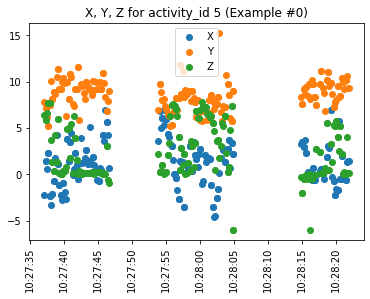

In [ ]:
plt.scatter(labeled_field.loc[0, "T"], labeled_field.loc[0, "X"], label="X")
plt.scatter(labeled_field.loc[0, "T"], labeled_field.loc[0, "Y"], label="Y")
plt.scatter(labeled_field.loc[0, "T"], labeled_field.loc[0, "Z"], label="Z")
plt.xticks(rotation=90)
plt.title("X, Y, Z for activity_id 5 (Example #0)")
plt.legend()
plt.show()


In [ ]:
def plot12(start, stop):
    plt.figure(figsize=(22, 29))
    j = 1
    for i in range(start, stop):
        plt.subplot(4, 3, j)
        plt.scatter(labeled_field.loc[i, "T"], labeled_field.loc[i, "X"], label="X")
        plt.scatter(labeled_field.loc[i, "T"], labeled_field.loc[i, "Y"], label="Y")
        plt.scatter(labeled_field.loc[i, "T"], labeled_field.loc[i, "Z"], label="Z")
        plt.xticks(rotation=45)
        plt.gca().fmt_xdata = mdates.DateFormatter("%M:%S")
        plt.title(
            f"X, Y, Z for activity_id {labeled_field.loc[i,'activity_type_id']} (Example #{i})"
        )
        plt.legend()
        j += 1
        plt.savefig(f"Plots/img{start}_to_{start+12}.jpg", dpi=100, format="jpg")
    plt.close()


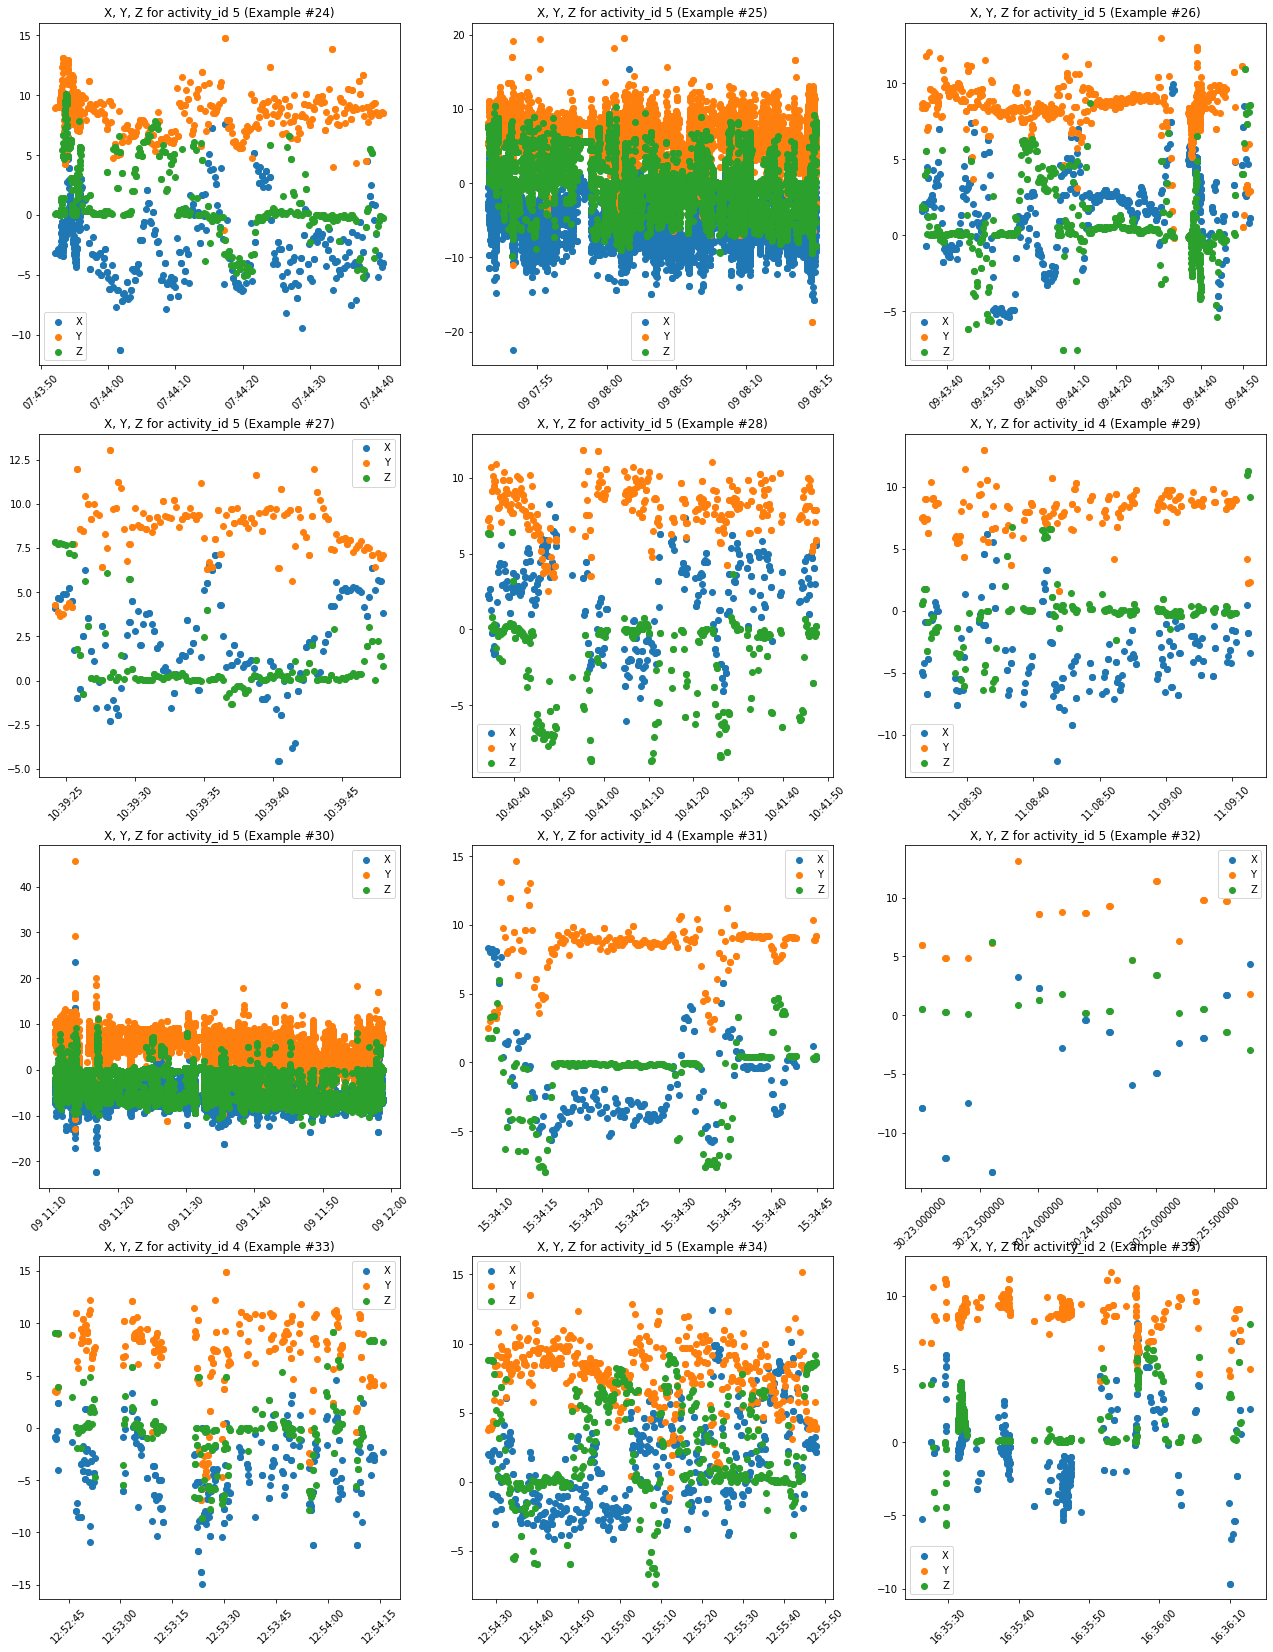

In [ ]:
plot12(24, 36)
